In [41]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 2000

# Paths

In [42]:
dataset = 'Data/mano_keypoint.csv'
modelo_path = 'Modelos/Sign_classifier_V2.1.keras'
tflite_path = 'Modelos/Sign_classifier_V2.1.tflite'

In [43]:
dataset

'Data/mano_keypoint.csv'

# Clases

Del -> '.'
Space -> ' '

In [44]:
CLASES=[' ','.','a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u', 'v', 'w', 'x', 'y', 'z']
NUM_CLASES = len(CLASES)

# Leer el dataset

In [45]:
#Cargar los datos desde la segunda columna hasta la última
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [46]:
#Cargar los datos de la primera columna
y_dataset = np.loadtxt(dataset, delimiter=',', dtype=str, usecols=(0))
# Obtener las clases y sus conteos
valores_unicos, conteos = np.unique(y_dataset, return_counts=True)
pd.DataFrame({'Clase': valores_unicos, 'Conteo': conteos})

,Clase,Conteo
0,,374
1,.,311
2,a,300
3,b,300
4,c,300
5,d,300
6,e,300
7,f,300
8,g,300
9,h,300


In [47]:
#Codificar las clases
y_dataset = np.array([CLASES.index(y) for y in y_dataset])

In [48]:
#Dividir el conjunto de prueba y entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.7, random_state=RANDOM_SEED)

# Configuracion del modelo

In [49]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )), #21 caracteristicas por cada entrada 2 dimensiones
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASES, activation='softmax')
])

In [50]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_4 (Dropout)         (None, 42)                0         
                                                                 
 dense_6 (Dense)             (None, 50)                2150      
                                                                 
 dropout_5 (Dropout)         (None, 50)                0         
                                                                 
 dense_7 (Dense)             (None, 30)                1530      
                                                                 
 dense_8 (Dense)             (None, 28)                868       
                                                                 
Total params: 4,548
Trainable params: 4,548
Non-trainable params: 0
_________________________________________________________________


In [51]:
# Guardar checkpoints durante el entrenamiento
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    modelo_path, verbose=1, save_weights_only=False)
# Early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=40, verbose=1)

In [52]:
# Generacion del modelo
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Entrenamiento

In [53]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
39/47 [=======================>......] - ETA: 0s - loss: 3.3036 - accuracy: 0.0509
Epoch 1: saving model to Modelos\Sign_classifier_V2.1.keras
47/47 [==============================] - 1s 7ms/step - loss: 3.2909 - accuracy: 0.0594 - val_loss: 3.1839 - val_accuracy: 0.1194
Epoch 2/1000
33/47 [====================>.........] - ETA: 0s - loss: 3.1450 - accuracy: 0.1122
Epoch 2: saving model to Modelos\Sign_classifier_V2.1.keras
47/47 [==============================] - 0s 5ms/step - loss: 3.1092 - accuracy: 0.1201 - val_loss: 2.9083 - val_accuracy: 0.1815
Epoch 3/1000
36/47 [=====================>........] - ETA: 0s - loss: 2.8607 - accuracy: 0.1699
Epoch 3: saving model to Modelos\Sign_classifier_V2.1.keras
47/47 [==============================] - 0s 4ms/step - loss: 2.8153 - accuracy: 0.1802 - val_loss: 2.5194 - val_accuracy: 0.2887
Epoch 4/1000
25/47 [==============>...............] - ETA: 0s - loss: 2.5489 - accuracy: 0.2294
Epoch 4: saving model to Modelos\Sign_classifier_

In [54]:
# Evaluación del modelo
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

20/20 [==============================] - 0s 2ms/step - loss: 0.1350 - accuracy: 0.9839


In [55]:
# Carga del modelo
model = tf.keras.models.load_model(modelo_path)

In [56]:
# Clasificacion
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))


1/1 [==============================] - 0s 30ms/step
[5.6854719e-07 1.7400813e-06 7.5830656e-08 8.3990211e-12 2.5246976e-08
 3.2979303e-06 2.2193303e-08 2.6964358e-11 2.5549051e-07 7.5023108e-09
 1.9744278e-13 8.4733311e-11 8.7319636e-09 9.9983287e-01 1.7082746e-10
 4.1751602e-14 3.9117434e-09 2.0101652e-06 2.8070739e-09 7.8437114e-15
 9.9962993e-10 1.4057220e-04 4.5564482e-07 1.6559718e-05 2.4935292e-11
 1.4956670e-06 3.0107543e-08 9.2800112e-10]
13


# Matriz de confusion y métricas de rendimiento

80/80 [==============================] - 0s 790us/step


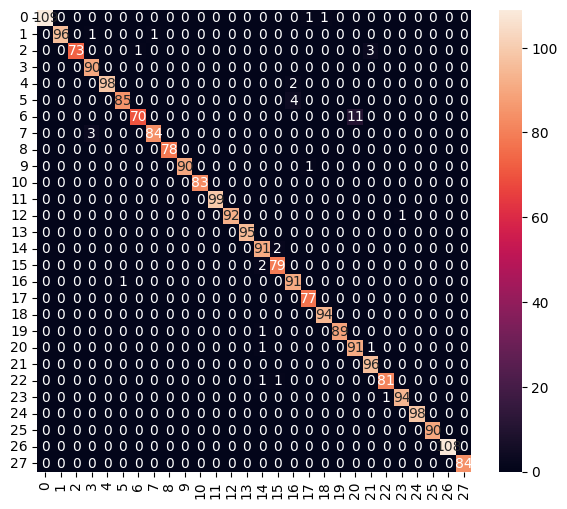

Metricas de rendimiento
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       111
           1       1.00      0.98      0.99        98
           2       1.00      0.95      0.97        77
           3       0.96      1.00      0.98        90
           4       1.00      0.98      0.99       100
           5       0.99      0.96      0.97        89
           6       0.99      0.86      0.92        81
           7       0.99      0.97      0.98        87
           8       1.00      1.00      1.00        78
           9       1.00      0.99      0.99        91
          10       1.00      1.00      1.00        83
          11       1.00      1.00      1.00        99
          12       1.00      0.99      0.99        93
          13       1.00      1.00      1.00        95
          14       0.95      0.98      0.96        93
          15       0.96      0.98      0.97        81
          16       0.94      0.99      0.96        92
   

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
#Generacion de matriz de confusion y reporte de clasificacion
def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Metricas de rendimiento')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convertir el modelo a Tensorflow-Lite

In [58]:
# Guardar el modelo en formato keras
model.save(modelo_path)

In [59]:

# Crear un convertidor TFLite a partir del modelo de Keras
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# Configurar el convertidor para aplicar optimizaciones de cuantización
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# Generar el modelo cuantizado
tflite_quantized_model = converter.convert()

# Guardar el modelo cuantizado en un archivo
open(tflite_path, 'wb').write(tflite_quantized_model)
#open('Modelos/Clasificador_gestos99.tflite', 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\juanj\AppData\Local\Temp\tmpkwcdb7_b\assets


INFO:tensorflow:Assets written to: C:\Users\juanj\AppData\Local\Temp\tmpkwcdb7_b\assets


9640

# Prueba de modelo

In [60]:
# Crear un intérprete de TensorFlow Lite a partir de un modelo TFLite
interpreter = tf.lite.Interpreter(model_path=tflite_path)

# Asignar tensores al intérprete
interpreter.allocate_tensors()

In [61]:
# Obtener los detalles de entrada y salida del intérprete
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [62]:
# Establecer el tensor de entrada del intérprete de TensorFlow Lite con el primer elemento de X_test
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [63]:
%%time
# Detalles del uso del modelo

# Invocar el intérprete para realizar la inferencia
interpreter.invoke()
# Obtener los resultados de la inferencia del tensor de salida
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [64]:
# Imprimir los resultados de la inferencia del modelo TFLite
print(np.squeeze(tflite_results))

# Imprimir el índice del valor máximo en los resultados, que corresponde a la clase predicha
print(np.argmax(np.squeeze(tflite_results)))

[5.2300015e-07 1.5476222e-06 6.8704900e-08 9.4607091e-12 2.8147376e-08
 3.8032008e-06 1.9964316e-08 2.0642578e-11 2.2997563e-07 6.6634871e-09
 1.4598842e-13 7.3424503e-11 9.7335056e-09 9.9983513e-01 1.6589824e-10
 4.0227102e-14 4.0402375e-09 1.6645974e-06 2.0268294e-09 9.5973703e-15
 9.0524471e-10 1.3926695e-04 4.5633465e-07 1.5370329e-05 2.7422292e-11
 1.9315987e-06 2.3860043e-08 1.1736699e-09]
13
